# Import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabets_df = pd.read_csv('datasets/diabetes.csv')
diabets_df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


# analysis

In [3]:
diabets_df.isnull().sum(axis=0)

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

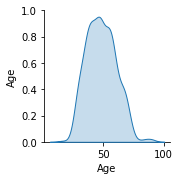

In [4]:
ax = sns.pairplot(diabets_df, diag_kind ='kde')

# Changing the dataset

In [5]:
diabets_df = diabets_df.replace(["Yes", "Male", "Positive"], 1.0)
diabets_df = diabets_df.replace(["No", "Female", "Negative"], 0.0)

In [6]:
diabets_df = diabets_df.astype('float64')

In [7]:
diabets_df[:360]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,54.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
356,43.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
357,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,55.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# selecting a test sample

In [8]:
train_x = diabets_df[:360].T[:16].T.to_numpy()
train_x

array([[40.,  1.,  0., ...,  1.,  1.,  1.],
       [58.,  1.,  0., ...,  0.,  1.,  0.],
       [41.,  1.,  1., ...,  1.,  1.,  0.],
       ...,
       [33.,  0.,  0., ...,  0.,  0.,  0.],
       [55.,  1.,  1., ...,  0.,  0.,  0.],
       [48.,  1.,  1., ...,  0.,  0.,  0.]])

In [9]:
train_y = np.array(list(map(lambda x: [x], list(diabets_df[:360]['class']))))
train_y[0:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [10]:
train_y = tf.keras.utils.to_categorical(train_y, 0)
train_y[0:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 16),
    tf.keras.layers.Dense(units = 2, activation = 'softmax')
])
model.compile(optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc'])


In [12]:
model.fit(train_x, train_y, epochs = 100)

Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 1.1354 - acc: 0.6729
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6254 - acc: 0.6607
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5372 - acc: 0.6605
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4853 - acc: 0.7725
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4545 - acc: 0.7685
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4499 - acc: 0.7826
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4322 - acc: 0.7961
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4003 - acc: 0.8738
Epoch 9/100
12/12 [==============================] - 0s 961us/step - loss: 0.3853 - acc: 0.8348
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3537 - acc: 0.8428
Epoch 11/100
12/12 [==============================] - 0s 

# Test

In [13]:
test_x = diabets_df[360:].T[:16].T.to_numpy()
test_x[0:5]

array([[56.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.],
       [38.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.,  0.],
       [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.],
       [68.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.],
       [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [14]:
test_y = tf.keras.utils.to_categorical(np.array(list(map(lambda x: [x], list(diabets_df[360:]['class'])))), 0)
test_y[0:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [15]:
train_y_model = model.predict(test_x)

# Post-processing

In [16]:
for i in range(len(train_y_model)):
    if train_y_model[i][0] > 0.5:
        train_y_model[i][0] = 1
        train_y_model[i][1] = 0
    else: 
        train_y_model[i][0] = 0
        train_y_model[i][1] = 1
    

# Accuracy


In [17]:
k = 0
for i in range(len(test_y)):
    if train_y_model[i][0] == test_y[i][0] and train_y_model[i][1] == test_y[i][1]:
        k += 1
print(k/len(test_y))

0.9375
